# Sentimental Analysis Using Customer Twitter Tweets on Iphone 14

#### Twitter sentiment analysis is performed to identify the sentiments of the people towards various topics. For this project, we will be analysing the sentiment of people towards Pfizer vaccines.  

#### We will be using the data available on Kaggle to create this machine learning model. The collected tweets from Twitter will be analysed using machine learning to identify the different sentiments present in the tweets. The different sentiments identified in this project include positive sentiment, negative sentiment and neutral sentiment. We will also be using different classifiers to see which classifier gives the best model accuracy.

### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

### Reading the Dataset and Analyzing the dataset

In [5]:
df = pd.read_csv('iphone14-query-tweets.csv')

In [6]:
df.head()

,date_time,username,user_location,user_description,verified,followers_count,following_count,tweet_like_count,tweet_retweet_count,tweet_reply_count,source,tweet_text
0,2022-09-08 22:49:29+00:00,TheAppleGang101,NaN,A new account dedicated to all of the latest l...,False,10,28,0,0,0,"<a href=""http://twitter.com/#!/download/ipad"" ...",iPhone SE 3 gets more expensive in the UK afte...
1,2022-09-08 22:49:27+00:00,TheJessicats,1999,Tweet like nobody’s reading • standup comedian...,False,1642,1444,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",@Travon I hope it happens before my iPhone 14 ...
2,2022-09-08 22:49:16+00:00,itschefnotjeff,📌 mom's basement,👨🏽‍💻💳🎫✈️,False,77,87,0,0,0,"<a href=""http://twitter.com/download/android"" ...","Nah iphone 14 upgrade just not it, change my m..."
3,2022-09-08 22:49:09+00:00,HalfRonin,Between the darkness and light,Preferring to be the dumbest person in the roo...,False,549,717,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",To the shock of absolutely no one: \n\nApple: ...
4,2022-09-08 22:49:09+00:00,Deejayrayman,Texas,Father of 3. Follower of Christ. Lover of all ...,False,48,153,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",@TMobile @TMobileHelp will you be able to orde...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144245 entries, 0 to 144244
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   date_time            144245 non-null  object
 1   username             144245 non-null  object
 2   user_location        97925 non-null   object
 3   user_description     127678 non-null  object
 4   verified             144245 non-null  bool  
 5   followers_count      144245 non-null  int64 
 6   following_count      144245 non-null  int64 
 7   tweet_like_count     144245 non-null  int64 
 8   tweet_retweet_count  144245 non-null  int64 
 9   tweet_reply_count    144245 non-null  int64 
 10  source               144245 non-null  object
 11  tweet_text           144245 non-null  object
dtypes: bool(1), int64(5), object(6)
memory usage: 12.2+ MB


In [8]:
df.isnull().sum()

date_time                  0
username                   0
user_location          46320
user_description       16567
verified                   0
followers_count            0
following_count            0
tweet_like_count           0
tweet_retweet_count        0
tweet_reply_count          0
source                     0
tweet_text                 0
dtype: int64

In [9]:
df.columns

Index(['date_time', 'username', 'user_location', 'user_description',
       'verified', 'followers_count', 'following_count', 'tweet_like_count',
       'tweet_retweet_count', 'tweet_reply_count', 'source', 'tweet_text'],
      dtype='object')

In [11]:
text_df = df.drop(['date_time', 'username', 'user_location', 'user_description',
       'verified', 'followers_count', 'following_count', 'tweet_like_count',
       'tweet_retweet_count', 'tweet_reply_count', 'source'], axis=1)
text_df.head()

,tweet_text
0,iPhone SE 3 gets more expensive in the UK afte...
1,@Travon I hope it happens before my iPhone 14 ...
2,"Nah iphone 14 upgrade just not it, change my m..."
3,To the shock of absolutely no one: \n\nApple: ...
4,@TMobile @TMobileHelp will you be able to orde...


In [12]:
print(text_df['tweet_text'].iloc[0],"\n")
print(text_df['tweet_text'].iloc[1],"\n")
print(text_df['tweet_text'].iloc[2],"\n")
print(text_df['tweet_text'].iloc[3],"\n")
print(text_df['tweet_text'].iloc[4],"\n")

iPhone SE 3 gets more expensive in the UK after the iPhone 14 event https://t.co/08sJ28TZ2W 

@Travon I hope it happens before my iPhone 14 arrives. 

Nah iphone 14 upgrade just not it, change my mind. 

To the shock of absolutely no one: 

Apple: Ready for the iPhone 14?
About the 3 ppl left who care: Yeah!
A: See also iPhone 13. 
3: Wut? 
A: see also iPhone 12 then. 
3: …
A: WANT ME TO GO BACK EVEN FURTHER??? 

@TMobile @TMobileHelp will you be able to order the iPhone 14 Pro online tomorrow? Or phone only? 



### Data Processing

In [17]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)


In [19]:
text_df.tweet_text = text_df['tweet_text'].apply(data_processing)

In [20]:
text_df = text_df.drop_duplicates('tweet_text') #Removing the duplicates from the dataset

In [21]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [23]:
text_df['tweet_text'] = text_df['tweet_text'].apply(lambda x: stemming(x))

In [24]:
text_df.head()

,tweet_text
0,iphone se 3 gets expensive uk iphone 14 event
1,travon hope happens iphone 14 arrives
2,nah iphone 14 upgrade change mind
3,shock absolutely one apple ready iphone 14 3 p...
4,tmobile tmobilehelp able order iphone 14 pro o...


In [25]:
print(text_df['tweet_text'].iloc[0],"\n")
print(text_df['tweet_text'].iloc[1],"\n")
print(text_df['tweet_text'].iloc[2],"\n")
print(text_df['tweet_text'].iloc[3],"\n")
print(text_df['tweet_text'].iloc[4],"\n")

iphone se 3 gets expensive uk iphone 14 event 

travon hope happens iphone 14 arrives 

nah iphone 14 upgrade change mind 

shock absolutely one apple ready iphone 14 3 ppl left care yeah see also iphone 13 3 wut see also iphone 12 3 want go back even 

tmobile tmobilehelp able order iphone 14 pro online tomorrow phone 



In [26]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108538 entries, 0 to 144243
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   tweet_text  108538 non-null  object
dtypes: object(1)
memory usage: 1.7+ MB


In [27]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [28]:
text_df['polarity'] = text_df['tweet_text'].apply(polarity)

In [29]:
text_df.head(10)

,tweet_text,polarity
0,iphone se 3 gets expensive uk iphone 14 event,-0.500000
1,travon hope happens iphone 14 arrives,0.000000
2,nah iphone 14 upgrade change mind,0.000000
3,shock absolutely one apple ready iphone 14 3 p...,0.100000
4,tmobile tmobilehelp able order iphone 14 pro o...,0.500000
5,chinas four major carriers support us version ...,0.062500
6,apple set unveil iphone 14 gear,0.000000
7,iphone 14 proslightly used ashaiman washington...,0.000000
8,anyone getting new iphone 14 doesnt know old i...,-0.003409
9,slutforvegeta cause im tempted exchange iphone...,0.000000


In [30]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [31]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [32]:
text_df.head()

,tweet_text,polarity,sentiment
0,iphone se 3 gets expensive uk iphone 14 event,-0.5,Negative
1,travon hope happens iphone 14 arrives,0.0,Neutral
2,nah iphone 14 upgrade change mind,0.0,Neutral
3,shock absolutely one apple ready iphone 14 3 p...,0.1,Positive
4,tmobile tmobilehelp able order iphone 14 pro o...,0.5,Positive


### Plotting the graph for sentiments generated from the dataset

<AxesSubplot:xlabel='sentiment', ylabel='count'>

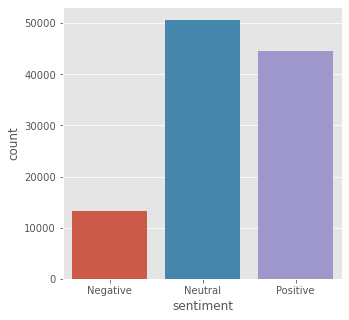

In [33]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

### Piechart for the sentiments

Text(0.5, 1.0, 'Distribution of sentiments')

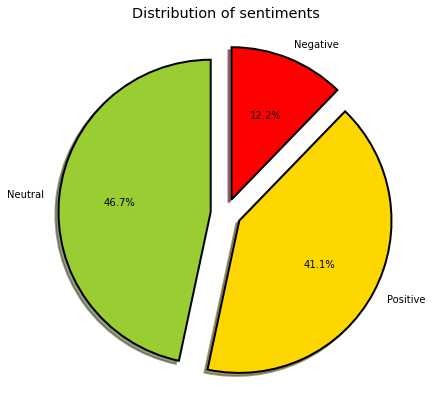

In [35]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [36]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,tweet_text,polarity,sentiment
41451,iphone 14 pro max best phone ever made,1.0,Positive
108219,best iphone cases 13 pro iphone 14 cases starb...,1.0,Positive
93463,iphone14fans looks totally awesome,1.0,Positive
96348,ishankotwal7 lordschott iphone14fans samsung b...,1.0,Positive
99710,iphone14fans tried generate iphone 14 stable d...,1.0,Positive


### Wordcloud for the positive tweets

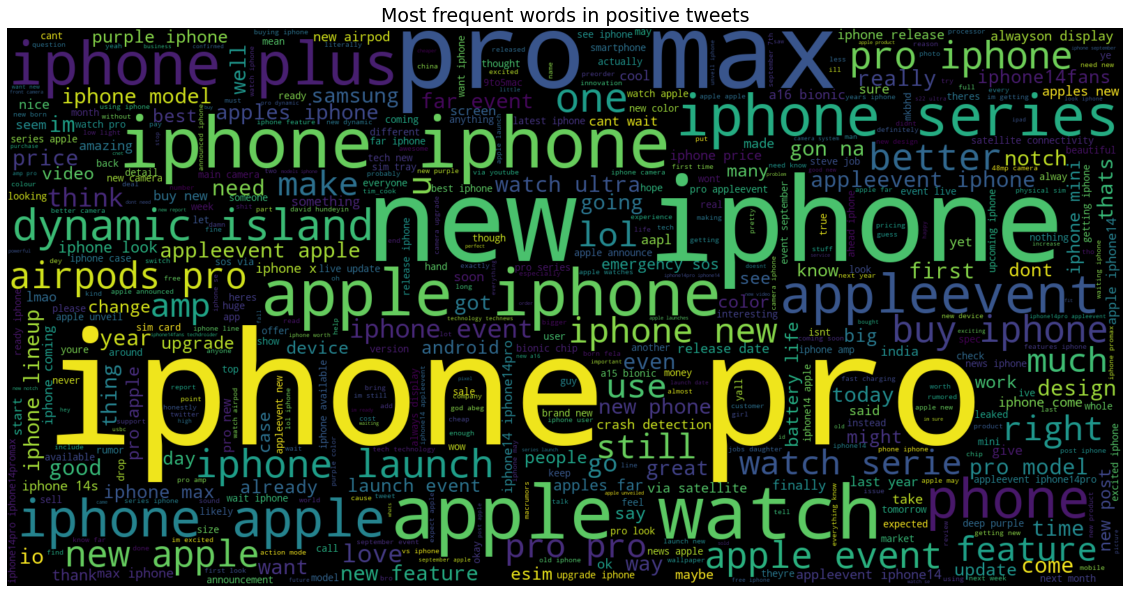

In [38]:
text = ' '.join([word for word in pos_tweets['tweet_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [39]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,tweet_text,polarity,sentiment
133893,far still consistently expecting launch ios 16...,-5.551115e-18,Negative
63710,nuxavi_ thegeeksjournai iphone 14 basic 128gb ...,-5.551115e-18,Negative
108236,radical_dude711 7feeling good schools coming a...,-9.251859e-18,Negative
10855,ahhh galaxys display completely broken ahhh al...,-1.110223e-17,Negative
16532,im also genuinely disappointed see space grey ...,-1.387779e-17,Negative


### Wordcloud for the negative tweets

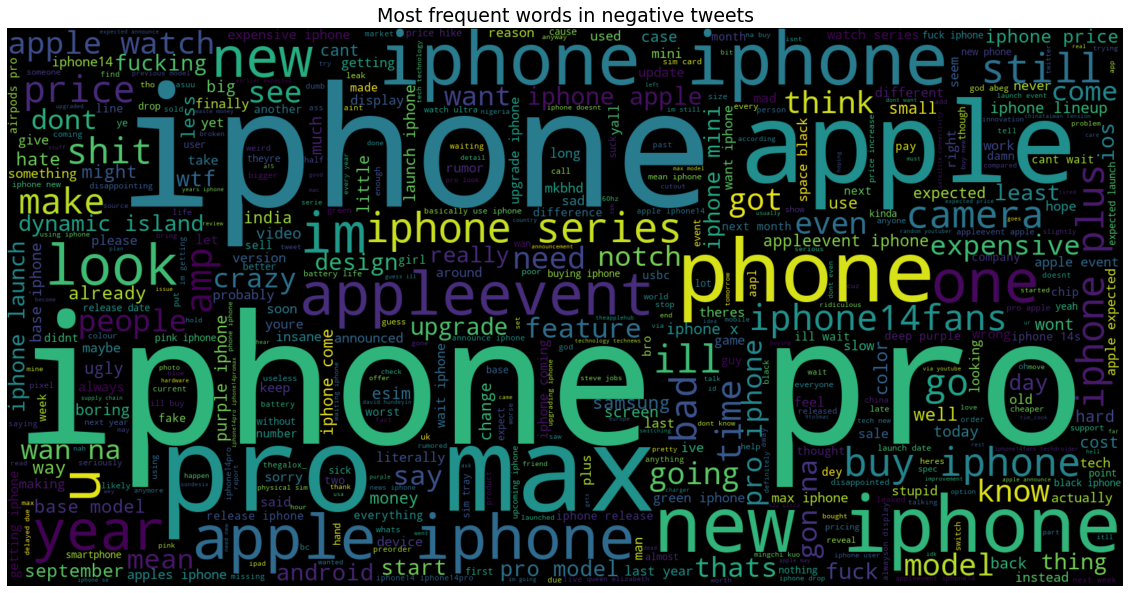

In [40]:
text = ' '.join([word for word in neg_tweets['tweet_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [41]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,tweet_text,polarity,sentiment
1,travon hope happens iphone 14 arrives,0.0,Neutral
94581,iphone14fans nothing phone 1,0.0,Neutral
94584,iphone 14 models apple iphone14 iphone,0.0,Neutral
94586,iphone 14 satellite connectivity rumor came back,0.0,Neutral
94587,andobil car vent phone mount 2022 upgrade stur...,0.0,Neutral


### Wordcloud for the neutral tweets

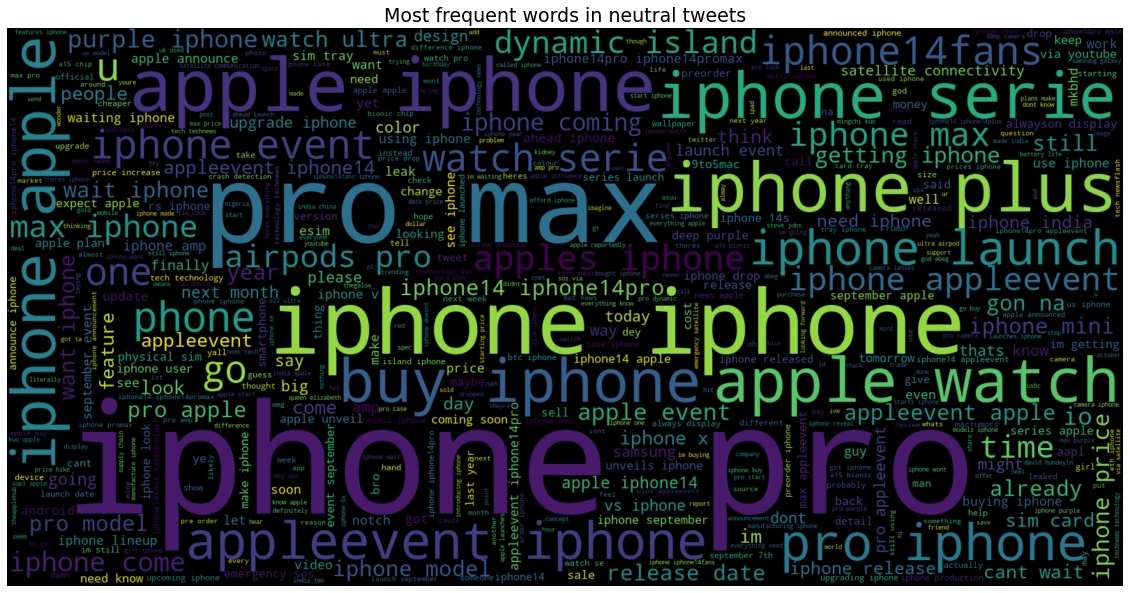

In [42]:
text = ' '.join([word for word in neutral_tweets['tweet_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

### Create a Bigram Model

In [43]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['tweet_text'])

In [44]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of features: 499743

First 20 features:
 ['00', '00 bottom', '00 iphone', '000', '000 6k', '000 appleevent', '000 entrylevel', '000 good', '000 help', '000 retweet', '000 travel', '000 tree', '000 usd', '000 weekend', '0000', '0000 0200', '000000', '000000 units', '000000000010', '000001s']


In [45]:
X = text_df['tweet_text']
Y = text_df['sentiment']
X = vect.transform(X)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [47]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (86830, 499743)
Size of y_train: (86830,)
Size of x_test: (21708, 499743)
Size of y_test: (21708,)


In [48]:
import warnings
warnings.filterwarnings('ignore')

### Build Logistic Regression Model

In [49]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 95.62%


In [50]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[2203  264  227]
 [  38 9989   50]
 [ 122  249 8566]]


              precision    recall  f1-score   support

    Negative       0.93      0.82      0.87      2694
     Neutral       0.95      0.99      0.97     10077
    Positive       0.97      0.96      0.96      8937

    accuracy                           0.96     21708
   macro avg       0.95      0.92      0.94     21708
weighted avg       0.96      0.96      0.96     21708



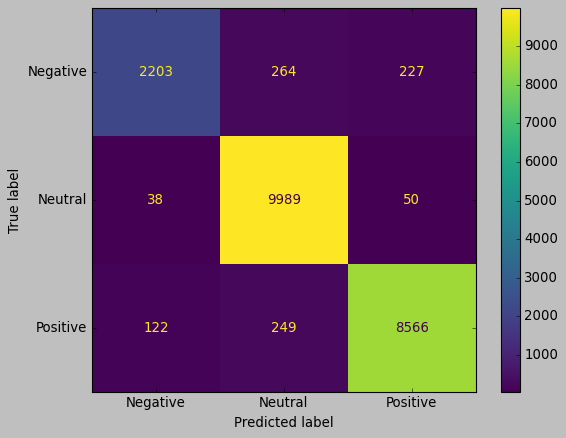

In [51]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

### Perform Hyperparameter tuning Using GridSearchCV

#### Hyperparameter tuning consists of finding a set of optimal hyperparameter values for a learning algorithm while applying this optimized algorithm to any data set. That combination of hyperparameters maximizes the model's performance, minimizing a predefined loss function to produce better results with fewer errors.

In [52]:
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [54]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [55]:
y_pred = grid.predict(x_test)

In [56]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 95.97%


In [57]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[2266  220  208]
 [  42 9983   52]
 [ 134  218 8585]]


              precision    recall  f1-score   support

    Negative       0.93      0.84      0.88      2694
     Neutral       0.96      0.99      0.97     10077
    Positive       0.97      0.96      0.97      8937

    accuracy                           0.96     21708
   macro avg       0.95      0.93      0.94     21708
weighted avg       0.96      0.96      0.96     21708



### Build Support Vector Machine (SVM) Model

In [58]:
from sklearn.svm import LinearSVC

In [59]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [60]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 96.84%


In [61]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 2356   148   190]
 [   41 10001    35]
 [  129   144  8664]]


              precision    recall  f1-score   support

    Negative       0.93      0.87      0.90      2694
     Neutral       0.97      0.99      0.98     10077
    Positive       0.97      0.97      0.97      8937

    accuracy                           0.97     21708
   macro avg       0.96      0.95      0.95     21708
weighted avg       0.97      0.97      0.97     21708



In [62]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [63]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 10}


In [69]:
y_pred = grid.predict(x_test)

In [70]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 95.97%


In [71]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[2266  220  208]
 [  42 9983   52]
 [ 134  218 8585]]


              precision    recall  f1-score   support

    Negative       0.93      0.84      0.88      2694
     Neutral       0.96      0.99      0.97     10077
    Positive       0.97      0.96      0.97      8937

    accuracy                           0.96     21708
   macro avg       0.95      0.93      0.94     21708
weighted avg       0.96      0.96      0.96     21708

